# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(adultDataSet_filename , header = 0)

df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [4]:
df['income_binary'].unique()

array(['<=50K', '>50K'], dtype=object)

In [5]:
df.shape

(32561, 15)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. adultDataSet_filename // Census data
2. I will be predicting the income of each individual, whether it is <=50K or >50K
3. Supervised Learning problem, it is a binary classification problem
4. Features are age, work-class, education, occupation, hours-per-week
5. This is an important problem because this could be used to evaluate the type of service to be provided to customers. Customers come from different socio-economic background. A telecommunication company trying to find churn rate could use income to determine its churn rate. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [6]:
df.shape

(32561, 15)

In [7]:
#Checking class imbalance
np.sum(df['income_binary'] == ('<=50K'))

24720

In [8]:
#checking class imbalance
np.sum(df['income_binary'] == ('>50K'))

7841

We see that there is class imbalance as >50K is only around 2.4% of the whole dataset for income_binary. Thus, we must downsample this data to practice fair AI

In [9]:
from sklearn.utils import resample

In [12]:
#check for class imbalance
df.income_binary.value_counts()

<=50K    24720
>50K      7841
Name: income_binary, dtype: int64

In [13]:
df_majority = df[df['income_binary'] == '<=50K']
df_minority = df[df['income_binary'] == '>50K']

df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=7841,     # to match minority class
                                 random_state=1234) 

In [15]:
#downsampled 
df = pd.concat([df_majority_downsampled, df_minority])

df.income_binary.value_counts()

<=50K    7841
>50K     7841
Name: income_binary, dtype: int64

In [16]:
df.shape

(15682, 15)

In [17]:
# Finding the null values 
np.sum(df.isnull(), axis = 0)

age                71
workclass         706
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        707
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week    156
native-country    282
income_binary       0
dtype: int64

In [27]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [28]:
#Keeping record of the missing data in boolean form
age_na = df['age'].isnull()
hpw_na = df['hours-per-week'].isnull()

In [29]:
#Handling missing values numerical values (age and hours-per-week)
age_mean = df['age'].mean()
df['age'].fillna(age_mean, inplace = True)

#Handling missing data value for hours-per-week
hpw_mean = df['hours-per-week'].mean()
df['hours-per-week'].fillna(hpw_mean, inplace = True)

In [30]:
#Confirm handled missing values. 
np.sum(df.isnull())

age                 0
workclass         706
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        707
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    282
income_binary       0
dtype: int64

In [31]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,15682.000000,1.568200e+04,15682.000000,15682.000000,15682.000000,15682.000000
mean,40.481327,1.880954e+05,10.612294,1128.172682,125.287782,42.145305
std,12.915667,1.044814e+05,2.617201,3319.671405,481.543796,12.045405
min,17.000000,1.487800e+04,1.000000,0.000000,0.000000,1.000000
25%,31.000000,1.176180e+05,9.000000,0.000000,0.000000,40.000000
50%,40.000000,1.767110e+05,10.000000,0.000000,0.000000,40.000000
75%,49.000000,2.340862e+05,13.000000,0.000000,0.000000,48.000000
max,90.000000,1.226583e+06,16.000000,14084.000000,4356.000000,99.000000


In [32]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.068403,0.077976,0.138773,0.060452,0.067759
fnlwgt,-0.068403,1.000000,-0.025454,0.004132,-0.008495,-0.011121
education-num,0.077976,-0.025454,1.000000,0.183439,0.100578,0.167273
capital-gain,0.138773,0.004132,0.183439,1.000000,-0.088426,0.106587
capital-loss,0.060452,-0.008495,0.100578,-0.088426,1.000000,0.063108
hours-per-week,0.067759,-0.011121,0.167273,0.106587,0.063108,1.000000


In [33]:
df.shape

(15682, 15)

In [34]:
#Performing one hot encoding on workclass column

In [35]:
df['workclass'].unique()

array(['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov',
       'State-gov', nan, 'Federal-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [36]:
#Changing workclass columns to Self-employed and not self-employed

#For self-employed
is_self_employed = (df['workclass'] == 'Self-emp-not-inc') | (df['workclass'] == 'Self-emp-inc')
not_null = ~(df['workclass'].isnull())

condition = is_self_employed & not_null

df['workclass'] = np.where(condition, "Self-Employed", df['workclass'])

df.head(30)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
12413,27.0,Private,298871,Bachelors,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Non-Female,0,0,40.000000,Philippines,<=50K
26423,22.0,Private,33087,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,45.000000,United-States,<=50K
14986,40.0,Self-Employed,27242,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,84.000000,United-States,<=50K
21617,21.0,Private,182614,Some-college,10,Never-married,Sales,Other-relative,White,Female,0,0,40.000000,Poland,<=50K
12588,22.0,Private,151888,HS-grad,9,Never-married,Other-service,Own-child,White,Non-Female,0,0,40.000000,United-States,<=50K
22635,51.0,Private,110458,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Non-Female,0,0,40.000000,United-States,<=50K
6600,33.0,Private,198660,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.000000,United-States,<=50K
19622,48.0,Private,164423,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40.000000,United-States,<=50K
11351,49.0,Self-Employed,201498,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Non-Female,0,0,40.000000,United-States,<=50K
11673,49.0,Private,30219,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Non-Female,0,1669,40.000000,United-States,<=50K


In [37]:
df['workclass'].unique()

array(['Private', 'Self-Employed', 'Local-gov', 'State-gov', nan,
       'Federal-gov', 'Without-pay', 'Never-worked'], dtype=object)

In [38]:
#Splitting categories to Self Employed and  Not Self employed
is_not_self_employed = ~(df['workclass'] == 'Self-Employed')

condition = is_not_self_employed & not_null

df['workclass'] = np.where(condition, "Not Self Employed", df['workclass']) 

df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
12413,27.0,Not Self Employed,298871,Bachelors,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Non-Female,0,0,40.000000,Philippines,<=50K
26423,22.0,Not Self Employed,33087,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,45.000000,United-States,<=50K
14986,40.0,Self-Employed,27242,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,84.000000,United-States,<=50K
21617,21.0,Not Self Employed,182614,Some-college,10,Never-married,Sales,Other-relative,White,Female,0,0,40.000000,Poland,<=50K
12588,22.0,Not Self Employed,151888,HS-grad,9,Never-married,Other-service,Own-child,White,Non-Female,0,0,40.000000,United-States,<=50K
22635,51.0,Not Self Employed,110458,Bachelors,13,Separated,Prof-specialty,Not-in-family,White,Non-Female,0,0,40.000000,United-States,<=50K
6600,33.0,Not Self Employed,198660,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Non-Female,0,0,50.000000,United-States,<=50K
19622,48.0,Not Self Employed,164423,HS-grad,9,Divorced,Machine-op-inspct,Unmarried,White,Female,0,0,40.000000,United-States,<=50K
11351,49.0,Self-Employed,201498,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Non-Female,0,0,40.000000,United-States,<=50K
11673,49.0,Not Self Employed,30219,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Non-Female,0,1669,40.000000,United-States,<=50K


In [39]:
df.shape

(15682, 15)

In [40]:
df['workclass'].unique()

array(['Not Self Employed', 'Self-Employed', nan], dtype=object)

In [41]:
#Preparing for one-hot-encoding
df_workclass = pd.get_dummies(df['workclass'], prefix = 'workclass')
df = df.join(df_workclass)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,workclass_Not Self Employed,workclass_Self-Employed
12413,27.0,Not Self Employed,298871,Bachelors,13,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Non-Female,0,0,40.0,Philippines,<=50K,1,0
26423,22.0,Not Self Employed,33087,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,45.0,United-States,<=50K,1,0
14986,40.0,Self-Employed,27242,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Non-Female,0,0,84.0,United-States,<=50K,0,1
21617,21.0,Not Self Employed,182614,Some-college,10,Never-married,Sales,Other-relative,White,Female,0,0,40.0,Poland,<=50K,1,0
12588,22.0,Not Self Employed,151888,HS-grad,9,Never-married,Other-service,Own-child,White,Non-Female,0,0,40.0,United-States,<=50K,1,0


In [42]:
#one hot encode the education section 
df_education = pd.get_dummies(df['education'], prefix = 'education')
df_education
df = df.join(df_education)

In [43]:
df.shape

(15682, 33)

In [44]:
df['occupation'].unique()

array(['Other-service', 'Farming-fishing', 'Sales', 'Prof-specialty',
       'Machine-op-inspct', 'Craft-repair', 'Adm-clerical',
       'Transport-moving', nan, 'Exec-managerial', 'Protective-serv',
       'Handlers-cleaners', 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [45]:
df['native-country'].unique()

array(['Philippines', 'United-States', 'Poland', 'Haiti', 'Puerto-Rico',
       'Mexico', nan, 'Canada', 'Vietnam', 'Jamaica', 'Trinadad&Tobago',
       'El-Salvador', 'Italy', 'Iran', 'Cambodia', 'Portugal', 'South',
       'Germany', 'China', 'India', 'Yugoslavia', 'Peru',
       'Dominican-Republic', 'Cuba', 'England', 'Nicaragua', 'Japan',
       'Ecuador', 'Taiwan', 'Columbia', 'Ireland', 'Laos', 'France',
       'Greece', 'Thailand', 'Outlying-US(Guam-USVI-etc)', 'Guatemala',
       'Honduras', 'Hungary', 'Hong', 'Scotland'], dtype=object)

In [46]:
df.shape

(15682, 33)

In [47]:
#One hot encode occupation column
df_occupation = pd.get_dummies(df['occupation'], prefix = 'occupation')
df_occupation
df = df.join(df_occupation)

In [48]:
#winsorizing the education-num to exclude the top and bottom 1% of data (outliers)
df['education-num-win'] = stats.mstats.winsorize(df['education-num'], limits=[0.01, 0.01])

In [49]:
#Dropping columns that can cause bias and are irrelevant
df.drop(columns = ['workclass', 'education-num', 'occupation', 'education', 'native-country','marital-status', 'race', 'relationship', 'fnlwgt', 'sex_selfID'], inplace = True)

In [50]:
#Ensure no missing values
np.sum(df.isnull())

age                             0
capital-gain                    0
capital-loss                    0
hours-per-week                  0
income_binary                   0
workclass_Not Self Employed     0
workclass_Self-Employed         0
education_10th                  0
education_11th                  0
education_12th                  0
education_1st-4th               0
education_5th-6th               0
education_7th-8th               0
education_9th                   0
education_Assoc-acdm            0
education_Assoc-voc             0
education_Bachelors             0
education_Doctorate             0
education_HS-grad               0
education_Masters               0
education_Preschool             0
education_Prof-school           0
education_Some-college          0
occupation_Adm-clerical         0
occupation_Armed-Forces         0
occupation_Craft-repair         0
occupation_Exec-managerial      0
occupation_Farming-fishing      0
occupation_Handlers-cleaners    0
occupation_Mac

In [51]:
df.head(30)

,age,capital-gain,capital-loss,hours-per-week,income_binary,workclass_Not Self Employed,workclass_Self-Employed,education_10th,education_11th,education_12th,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,education-num-win
12413,27.0,0,0,40.000000,<=50K,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,13
26423,22.0,0,0,45.000000,<=50K,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
14986,40.0,0,0,84.000000,<=50K,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
21617,21.0,0,0,40.000000,<=50K,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,10
12588,22.0,0,0,40.000000,<=50K,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,9
22635,51.0,0,0,40.000000,<=50K,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,13
6600,33.0,0,0,50.000000,<=50K,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,13
19622,48.0,0,0,40.000000,<=50K,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,9
11351,49.0,0,0,40.000000,<=50K,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,9
11673,49.0,0,1669,40.000000,<=50K,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Yes, I removed workclass, occupation, education, native-country, marital-status, race, relationship, fnlwgt, and sex_selfID. I kept age, education-num, capital gain, capital loss, hours per week, and  I one hot encoded occupation, employment/workclass, and education.
2. I did some feature engineering techniques like one-hot-encoded. I also winsorized the education-num columns to ensure that the outliers do not skew the data. 
3. My model will be KNN and DT. I will compare between the models to see which yields the highest accuracy score.
4. I plan to test different models, like DT and KNN and seeing which model performs better. I will also fine tune different hyperparameters to find the best value and graph the results to visualize which model yields a higher accuracy score.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [52]:
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [53]:
# setting the labels (y) and features (X)
X = df.drop(columns = 'income_binary')
y = df['income_binary']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state =1234)

In [55]:
def train_DT(X_train, X_test, y_train, y_test, depth, leaf=2, crit='entropy'):
    '''
    Create and train a decision tree model 
    '''
    model = DecisionTreeClassifier(criterion = crit, min_samples_leaf = leaf, max_depth = depth)
    model.fit(X_train, y_train)
    class_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_predictions) 

    return acc_score

In [56]:
#print out the accuracy score for different depths of the decision tree
depth_list = [8, 10, 9, 21, 32]
DT_acc_score = []

for d in depth_list: 
    acc_score = train_DT(X_train, X_test, y_train, y_test, d)
    DT_acc_score.append(acc_score)
    print('Depth ' + str(d) + ": " + str(acc_score))

Depth 8: 0.740340030911901
Depth 10: 0.7561823802163833
Depth 9: 0.750772797527048
Depth 21: 0.7337712519319938
Depth 32: 0.722952086553323


In [57]:
def train_KNN (X_train, y_train, X_test, y_test, k):
    '''
    Train the KNN model with k being a hyperparameter and algorithm as kd_tree.
    Returns the accuracy score
    '''
    model = KNeighborsClassifier(n_neighbors = k, algorithm = 'kd_tree')
    model.fit(X_train, y_train)
    class_predictions = model.predict(X_test)
    acc_score = accuracy_score(y_test, class_predictions)

    return acc_score

In [58]:
#Print the accuracy score for KNN Model.
k_list = [3, 5, 6, 7, 8, 9]
KNN_acc_score = []

for k in k_list: 
    acc_score = train_KNN(X_train, y_train, X_test, y_test, k)
    KNN_acc_score.append(acc_score)
    print("K " + str(k) + ": " + str(acc_score))

K 3: 0.7471020092735703
K 5: 0.7577279752704791
K 6: 0.759080370942813
K 7: 0.758307573415765
K 8: 0.7615919629057187
K 9: 0.7631375579598145


In [59]:
#KNN had a better score

In [60]:
def visualize_accuracy(param, acc_score):
    '''
    Visualize the relaitonship between accuracy score and hyperparameters. 
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)
    grid = sns.lineplot(x =param, y=acc_score)

    plt.title("Accuracy vs. Hyperparameter Lineplot Graph") 
    ax.set_xlabel("Hyperparamter") 
    ax.set_ylabel("Accuracy Score")
    plt.show()

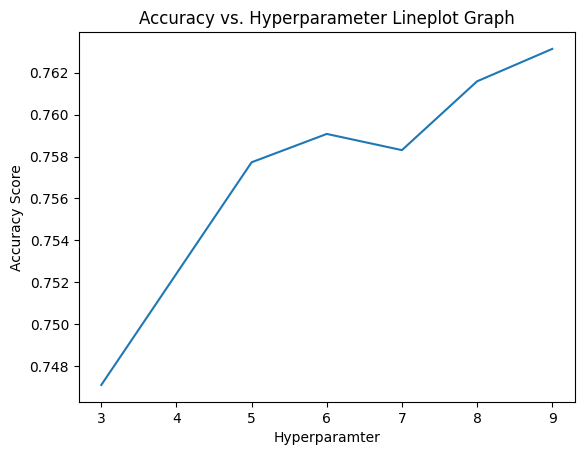

In [61]:
#Visualizing for KNN Model.
visualize_accuracy(k_list, KNN_acc_score)

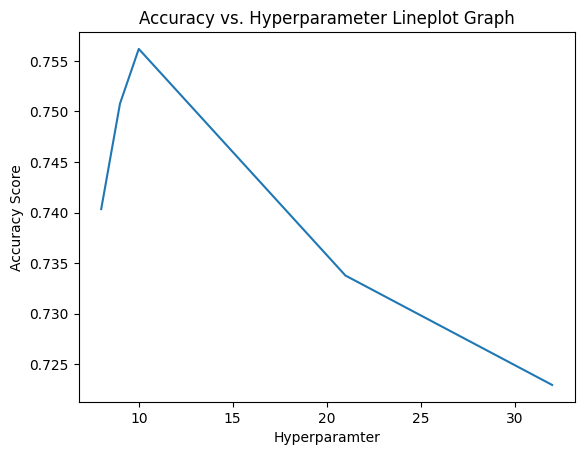

In [62]:
#Visualizing accuracy for DT
visualize_accuracy(depth_list, DT_acc_score)

In [63]:
#fine tuning the number of leafs with the depth list. 
leaf_list = [x for x in range(1, 11)]

DT_acc_score2 = []
for d in depth_list: 
    for l in leaf_list: 
        acc_score = train_DT(X_train, X_test, y_train ,y_test, d, leaf= l) 
        DT_acc_score2.append(acc_score) 
        print('Depth ' + str(d) + ' Leaf ' + str(l) + ": " + str(acc_score))


Depth 8 Leaf 1: 0.740533230293663
Depth 8 Leaf 2: 0.740340030911901
Depth 8 Leaf 3: 0.7418856259659969
Depth 8 Leaf 4: 0.7424652241112828
Depth 8 Leaf 5: 0.7434312210200927
Depth 8 Leaf 6: 0.740726429675425
Depth 8 Leaf 7: 0.740726429675425
Depth 8 Leaf 8: 0.740146831530139
Depth 8 Leaf 9: 0.7391808346213292
Depth 8 Leaf 10: 0.7387944358578052
Depth 10 Leaf 1: 0.7561823802163833
Depth 10 Leaf 2: 0.7552163833075735
Depth 10 Leaf 3: 0.7569551777434312
Depth 10 Leaf 4: 0.759080370942813
Depth 10 Leaf 5: 0.759853168469861
Depth 10 Leaf 6: 0.7579211746522411
Depth 10 Leaf 7: 0.758887171561051
Depth 10 Leaf 8: 0.7567619783616693
Depth 10 Leaf 9: 0.7556027820710973
Depth 10 Leaf 10: 0.7554095826893354
Depth 9 Leaf 1: 0.750386398763524
Depth 9 Leaf 2: 0.7509659969088099
Depth 9 Leaf 3: 0.7536707882534776
Depth 9 Leaf 4: 0.7542503863987635
Depth 9 Leaf 5: 0.7550231839258115
Depth 9 Leaf 6: 0.7517387944358578
Depth 9 Leaf 7: 0.7534775888717156
Depth 9 Leaf 8: 0.7528979907264297
Depth 9 Leaf 9: 0

It seems like the optimal performance for decision tree is at Depth 10 Leaf 5

In [64]:
train_DT(X_train, X_test, y_train, y_test, depth = 10, leaf = 5)

0.759853168469861

I am going to make the DT model where depth = 10, and leaf = 3 and produce a confusion matrix for the optimal DT model. 

In [65]:
best_model = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 5, max_depth = 10)
best_model.fit(X_train, y_train)
class_predictions = best_model.predict(X_test)
acc_score = accuracy_score(y_test, class_predictions) 
print(acc_score)

0.759853168469861


In [67]:
#confusion matrix of results to see where error lies
c_m = confusion_matrix(y_test, class_predictions, labels = ['<=50K', '>50K'])

pd.DataFrame(
c_m,
columns=['Predicted: <=50K', 'Predicted: >50K'],
index=['Actual: <=50K', 'Actual: >=50K']
)


,Predicted: <=50K,Predicted: >50K
Actual: <=50K,1784,815
Actual: >=50K,428,2149


In [68]:
#Print the accuracy score for KNN Model.
k_list = [x for x in range (2, 30)]
KNN_acc_score=[]

for k in k_list: 
    acc_score = train_KNN(X_train, y_train, X_test, y_test, k)
    KNN_acc_score.append(acc_score)
    print("K " + str(k) + ": " + str(acc_score))

K 2: 0.7266228748068007
K 3: 0.7471020092735703
K 4: 0.7513523956723338
K 5: 0.7577279752704791
K 6: 0.759080370942813
K 7: 0.758307573415765
K 8: 0.7615919629057187
K 9: 0.7631375579598145
K 10: 0.7644899536321483
K 11: 0.767967542503864
K 12: 0.7689335394126738
K 13: 0.7708655332302936
K 14: 0.7700927357032458
K 15: 0.7695131375579598
K 16: 0.7727975270479135
K 17: 0.7716383307573416
K 18: 0.7726043276661515
K 19: 0.767774343122102
K 20: 0.7724111282843895
K 21: 0.7687403400309119
K 22: 0.7714451313755796
K 23: 0.7706723338485317
K 24: 0.768353941267388
K 25: 0.7691267387944358
K 26: 0.7698995363214838
K 27: 0.767387944358578
K 28: 0.7704791344667697
K 29: 0.768353941267388


In [ ]:
#visualize the KNN
visualize_accuracy(k_list, KNN_acc_score)

Highest at K = 16, so we will make a new model with the optimal performing and make a confusion matrix.

In [257]:
model = KNeighborsClassifier(n_neighbors = 16, algorithm = 'kd_tree')
model.fit(X_train, y_train)
class_predictions = model.predict(X_test)
acc_score = accuracy_score(y_test, class_predictions)

print(acc_score)

0.7727975270479135


In [1]:
c_m = confusion_matrix(y_test, class_predictions, labels = ['<=50K', '>50K'])
c_m

pd.DataFrame(
c_m,
columns=['Predicted: <=50K', 'Predicted: >50K'],
index=['Actual: <=50K', 'Actual: >50K']
)

NameError: name 'confusion_matrix' is not defined

Overall, the better performing model is the KNN with an accuracy of 0.773 score. 